In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import random
import numpy as np

In [109]:
import seaborn as sns
%matplotlib inline 

In [13]:
class TrafficSimulator1(object):
    def __init__(self, length = 100, density, vmax=5, slow=0.5):
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road, among the two lanes, and start with random velocities.

        Inputs:

            length (int) The number of cells in the road. Default = 100.  

            density (float) The fraction of cells that have a car on them.

            slow (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.5.

            vmax (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
        self.length = length
        self.density = density
        self.vmax = vmax
        self.slow = slow 
        self.current_state = scipy.zeros(self.length)
        self.next_state = scipy.zeros(self.length)
        # Track the time steps and total number of cars that passed the simulation
        # boundary to estimate average traffic flow.
        self.cumulative_traffic_flow=0
        self.time_step = 0 
        
        
    def initialize(self):
        random_indices = scipy.random.choice(
            range(self.length),
            size=int(round((self.density) * self.length)),
            replace=False)
        self.current_state.fill(-1)
        self.current_state[random_indices] = scipy.random.randint(low = 0, 
                                                                  high = self.vmax +1,
                                                                  size = int(round(self.density * self.length)))

        
    def display(self):
        print(''.join('.' if int(x) == -1 else str(int(x)) for x in self.current_state))


    def step(self):
        for i in range(0, self.length):
            if self.current_state[i] != -1:
                #Calculate distance from this car to next car: 
                # Distance is the number of empty cells between this car and the next plus 1
                distance_to_next=0
                j=i
                found_next=False
                while not found_next:
                    j+=1
                    if self.current_state[j%len(self.current_state)] == -1:
                        distance_to_next+=1
                    else:
                        found_next=True
                distance_to_next+=1 
                #Rule 1: acceleration
                if self.current_state[i] < self.vmax and distance_to_next > self.current_state[i] + 1: 
                    self.current_state[i] = min(self.current_state[i] + 1, self.vmax)
                #Rule 2: deterministic deceleration
                if distance_to_next <= self.current_state[i]: 
                    self.current_state[i] = distance_to_next - 1
                #Rule 3: random deceleration 
                if scipy.random.random() < self.slow:
                    self.current_state[i] = max(self.current_state[i] - 1,0)
                    
        #Rule 4: Move cars forward using their updated velocities
        self.next_state.fill(-1)
        for i in range(0, self.length):
            v = self.current_state[i]
            if v != -1: 
                self.next_state[int((i+v)%self.length)] = v    
        
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        # Update time and traffic flow
        self.time_step += 1
        for i in range(self.vmax):
            if self.current_state[i] > i:
                self.cumulative_traffic_flow += 1
        

In [91]:
#Function to display the states for traffic simulator 1: 
def display_states_1(dens):
    test = TrafficSimulator1(length=100, density=dens, vmax = 5, slow = 0.5)
    test.initialize()
    test.display()
    for i in range(0,20):
        test.step()
        test.display()

In [116]:
#Producing Figure 1 
display_states_1(0.03)

.......3.................................0...............2..........................................
..........3..............................0..................3.......................................
..............4...........................1....................3....................................
..................4.........................2......................4................................
......................4........................3.......................4............................
...........................5......................3........................4........................
................................5.....................4........................4....................
.....................................5....................4.........................5...............
..........................................5....................5.........................5..........
...............................................5....................5......................

In [93]:
#Producing Figure 2 
display_states_1(0.1)

.....3.5....4........................3...........5........4...3..0....0..............3..............
......1...3.....4........................4............5......3..2.1....1.................4..........
.......1......4......5.......................4.............5..1.0...2...1.....................5.....
........1..........5......5.......................5..........2.10.....2...2........................5
....5.....2.............5......5.......................5......100.......2....3......................
........4....3...............5.....4........................5.00.1........2.....3...................
............4...3................4.....4.....................100..1.........2......3................
..............2.....4.................5.....5................000...1...........3.......4............
.................3.......5................4.....4............00.1....2.............4........5.......
.....................4........5................5.....5.......0.1.1......3..............4...

In [94]:
#Producing Figure 3 
display_states_1(0.3)

2..3....4..50.....3.4.1....2.1..2...3..2.0...50..3..4....1..34.3.0..12...0.1...........3......1..5..
..2....4..200.....0..1..2...1.1...2...2.10...0.1...2...3...20.1.10..0..2..1..2.............4....2..2
1....3...200.1.....1...2..2..1.1....2..10.1..0...2...2...2.0.10.0.1.0...1..1....3..............4..2.
.1.....2.00.1.1......2...2.1.0..1.....200..1..1.....3..2.0.0.0.1.10.0....1...2......4...........1..1
...2...0.00.0..1........3.10..1...2...00.1..1..1.....1.0.0.0.0..10.10......2....3.......4........1.0
1.....30.00..1...2......0.00....2...2.0.1..2..2.1.....1.10..10..0.10.1........3....3.........5....1.
.1....0.100...1....2.....10.1......3.1.1..2..20..1....0.0.1.0.1..100..1..........3.....4.........4.1
..1....100.1....2....2...00..1......1.1.1...20.1...2..0..10..1.1.00.1...2............4......5....0.0
....2..000..1......3...2.0.1...2.....1.1.1..00...2..1.0..00..0.0.0.1..2...2...............5....3..10
.....1.000...1.......2..10..1.....3...1.1..20.1....2.10..0.1..1.10...2..2...2..............

In [95]:
class TrafficSimulator2(object):
    def __init__(self, length, density, vmax, slow, change):
        '''
        Create a new traffic simulation object for two-lane model. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            length (int) The number of cells in one lane. Default = 100.  

            density (float) The fraction of cells that have a car on them.

            vmax (int) The maximum speed in car cells per update step.
              Default: 5. 
            slow (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.5.
            change (float) The probability that a car will switch to the other lane 

        '''
        self.length = length
        self.density = density
        self.vmax = vmax
        self.slow = slow #prop of slowing down
        self.change = change  #prop of changing lane
        #A state is represented as a 2 dimensional array
        self.current_state = np.zeros((2,self.length)) 
        self.next_state = np.zeros((2,self.length))
        # Track the time steps and total number of cars that passed the simulation
        # boundary to estimate average traffic flow.
        self.cumulative_traffic_flow = 0
        self.time_step=0
        
    def initialize(self):
        #Creating random indices from 0 to number of cells in both two lanes - 1 
        random_indices = np.random.randint(
            0,self.length*2-1,
            size=int(round((self.density*2)*self.length)))
        #Each car will have two attributes: the lane it belongs to and its location on that lane
        pos_indices=random_indices%self.length #car position on one lane 
        lane_indices=random_indices//self.length #the lane that car belongs 
        self.current_state.fill(-1)
        #Fill up initial state with random car velocities: 
        for i in range(len(random_indices)):
            self.current_state[lane_indices[i]][pos_indices[i]]= scipy.random.randint(low = 0, 
                                                                  high = self.vmax +1)
        
    def display(self):     
        print(''.join('.' if int(x) == -1 else str(int(x)) for x in self.current_state[0]))
        print(''.join('.' if int(x) == -1 else str(int(x)) for x in self.current_state[1]))
    
    def calculate_gaps(self,this_lane, other_lane):
        '''
        Calculate gaps: 
        Input: 
        this_lane: the lane that we are looping through 
        other_lane: the lane that we consider for cars to switch to. 
        Output: 
        gap: number of empty sites between this car and next car on the same lane
        gap0: number of empty sites between this car and next car on the other lane
        gapb: number of empty sites between this car and the car behind it on the other lane
        '''
         
        gaps=[]
        #Loop through the whole lane: 
        for i in range(0,self.length):
            gap=0 
            gap0=0 
            gapb=0 
            #Only calculate gaps when there is a car present at the site: 
            if self.current_state[this_lane][i] != -1:
                #if there is another car right at the space parallel to the current car 
                #the gap0 and gapb are assigned -1, which means car can't switch lane.
                if self.current_state[other_lane][i] != -1:
                    gap0 = -1
                    gapb = -1
                j = i
                j0 = i
                jb = i
                found_next=False
                found_next0=False
                found_back=False
                #Measure gap from this car to next car on the same lane:
                #if this is the only car on this lane, gap is assigned 100
                #which means car can move freely on its own lane. 
                count_this_lane=0
                for car in self.current_state[this_lane]:
                    if car != -1:
                        count_this_lane+=1
                if count_this_lane == 1:
                    gap =100 
                #else: we calculate the gap 
                else:
                    while not found_next:
                        j+=1
                        if self.current_state[this_lane][j%len(self.current_state[this_lane])] == -1:
                            gap+=1
                        else:
                            found_next=True
                #Count the number of cars on the other lane: 
                count_other_lane=0
                for c in self.current_state[other_lane]:
                    if c != -1:
                        count_other_lane+=1
                #if there is no car on the other lane, we assign gap0 and gapb to be 100
                #which means this car can switch freely to the other lane if the random condition is satisfied
                if count_other_lane == 0:
                    gap0=100
                    gapb=100
                #Else: 
                else:
                    #Measure gap from this car to next car on the other lane:
                    while not found_next0:
                        j0+=1
                        if self.current_state[other_lane][j0%len(self.current_state[other_lane])] == -1:
                            gap0+=1
                        else:
                            found_next0=True
                    #Measure gap from this car to the previous car on the other lane:
                    while not found_back:
                        jb-=1
                        if self.current_state[other_lane][jb%len(self.current_state[other_lane])] == -1:
                            gapb+=1
                        else:
                            found_back=True
            gaps.append((gap,gap0,gapb))      
        return (gaps)
            
    def change_lane(self):
        '''
        Implement rules to switch lane: 
        '''
        #Calculate gaps for cars on lane 0
        gap01 = self.calculate_gaps(0,1)
        #Calculate gaps for cars on lane 1
        gap10 = self.calculate_gaps(1,0)
        #Make a copy of each of the lane: 
        temp0 = self.current_state[0].copy()
        temp1 = self.current_state[1].copy()
        #Cars switch from lane 0 to lane 1:
        for i in range(0,self.length):
            cond01_1 = self.current_state[0][i]+1 > gap01[i][0]
            cond01_2 = self.current_state[0][i]+1 < gap01[i][1]
            cond01_3 = self.vmax < gap01[i][2]
            cond01_4 = scipy.random.random() < self.change
            if cond01_1 and cond01_2 and cond01_3 and cond01_4:
                temp1[i] = self.current_state[0][i]
                temp0[i] = -1
        #Cars switch from lane 1 to lane 0
        for j in range(0,self.length):
            cond10_1 = self.current_state[1][j]+1 > gap10[j][0]
            cond10_2 = self.current_state[1][j]+1 < gap10[j][1]
            cond10_3 = self.vmax < gap10[j][2]
            cond10_4 = scipy.random.random() < self.change
            if cond10_1 and cond10_2 and cond10_3 and cond10_4:
                temp0[j] = self.current_state[1][j]
                temp1[j] = -1
        #Update both lanes at the same time: 
        self.current_state[0] = temp0.copy()
        self.current_state[1] = temp1.copy()
                
    def step_for_one_lane(self,lane):
        '''
        Implement the rules for cars to change their velocities one lane after switching step
        '''
        for i in range(0, self.length):
            if self.current_state[lane][i] != -1:
                #Calculate gap from this car to next car on the same lane: 
                distance_to_next=0
                j=i
                found_next=False
                while not found_next:
                    j+=1
                    if self.current_state[lane][j%len(self.current_state[lane])] == -1:
                        distance_to_next+=1
                    else:
                        found_next=True
                #Rule 1: 
                if self.current_state[lane][i] < self.vmax and distance_to_next > self.current_state[lane][i]:
                    self.current_state[lane][i] = min(self.current_state[lane][i] + 1, self.vmax)
                #Rule 2: 
                if distance_to_next < self.current_state[lane][i]: 
                    self.current_state[lane][i] = distance_to_next
                #Rule 3: 
                if scipy.random.random() < self.slow:
                    self.current_state[lane][i] = max(self.current_state[lane][i] - 1,0)
        #Rule 4:  
        self.next_state[lane].fill(-1)
        for i in range(0, self.length):
            v = self.current_state[lane][i]
            if v != -1: 
                self.next_state[lane][int((i+v)%self.length)] = v
    def after_move_car(self):
        #Move cars on both lanes at the same time: 
        self.step_for_one_lane(0)
        self.step_for_one_lane(1)
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time_step += 1
        # Update time and traffic flow
        for i in range(self.vmax):
            if self.current_state[0][i] > i:
                self.cumulative_traffic_flow += 1
            if self.current_state[1][i] > i:
                self.cumulative_traffic_flow += 1
        

In [128]:
def display_states_2(dens):
    test = TrafficSimulator2(length=100, density=dens, vmax = 5, slow = 0.5, change=1)
    test.initialize()
    print ("Initial State: ")
    test.display()
    for i in range(0,20):
        print("Step %s" % (i+1))
        test.change_lane()
        test.after_move_car()
        test.display()

In [129]:
display_states_2(0.03)

Initial State: 
...........3.0.......................4..........................................3...................
............................................................1......................4................
Step 1
..............1..........................4.........................................3................
...............4..............................................2.........................5...........
Step 2
................2............................4.........................................4............
...................4............................................2...........................4.......
Step 3
..................2..............................4.........................................4........
.......................4..........................................2.............................4...
Step 4
.....................3...............................4..........................................5...
4...........................5..................

In [130]:
display_states_2(0.1)

Initial State: 
32...................00.........0...................................2...........3...................
.3................1..............2.....5..............1.5......2.33.....34.....0.4..................
Step 1
0..2.................0.1........0.......................2.........3...2.............4...............
....3...............2...............3.......5...............4....0...3..0....4.0......5.............
Step 2
0.....3...............1.1.......0..........................3.........3...3.......4.......5..........
.......3...............3................4.......4...............4.1....20......0...........5........
Step 3
0........3.............1.1......0.............................3........2....3........4........5.....
...........4...............4.................5......4...........0..1...00.......1..............4....
Step 4
0............4............1......1................................4....0.......3.........4........4.
5...............5........2......5..............

In [131]:
display_states_2(0.3)

Initial State: 
..........50....2.3..3.2...2..4.3.......0....3.53.4...231......3..1.....1.........4.4.....2.3..5....
.0......2...0.4.............2......1........3..........3...4...541.....4433..........214.0..0.52..4.
Step 1
..........00.....1...3....3.1..1...3.....1...0.00...2.00..2......2.1......2........1....4..1..2....4
..1.......2..1.....5.....4.....3....1..........3.........2...2.00.1....000....4......000..1..10.1..1
Step 2
...4......00.......2.....40..1..1......4..1..0..0....1..1...2.....1.1........3......1.....2.1....3..
1...2......1...2.......4.....4....3..1..........1......1....3.100...2..00.1........5.00.1..1.00..1..
Step 3
3......4..0.1.........3..00....2..2......2.1.0..0.....1..1.....3..0...2..........4....2....1.1......
.1.....3.....2....3........4....3..1...2.........1......1....100.1...1.00...2......0.0.1.1.0.0.1..1.
Step 4
...3.....20..1..........200.....1...2....0..10..0......1...2.....2.1....2............4..2..0...2....
..1........4...2......4.......3...2.1.....3....

In [101]:
class TrafficSimulator3(object):
    def __init__(self, length, density, vmax, slow, change):
        '''
        Create a new traffic simulation object for three-lane model. Cars are distributed randomly
        along the road, among the three lanes and start with random velocities.

        Inputs:

            length (int) The number of cells in one lane. Default = 100.  

            density (float) The fraction of cells that have a car on them.

            vmax (int) The maximum speed in car cells per update step.
              Default: 5. 
            slow (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.5.
              
            change (float) The probability that a car will switch to the other lane 

        '''
        self.length = length
        self.density = density
        self.vmax = vmax
        self.slow = slow #prop of slowing down
        self.change = change  #prop of changing lane
        #A state is represented as a 3 dimensional array: 
        self.current_state = np.zeros((3,self.length)) 
        self.next_state = np.zeros((3,self.length))
        # Track the time steps and total number of cars that passed the simulation
        # boundary to estimate average traffic flow.
        self.cumulative_traffic_flow = 0
        self.time_step = 0
        
    def initialize(self):
        random_indices = np.random.randint(
            0,self.length*3-1,
            size=int(round(self.density*3*self.length)))
        pos_indices=random_indices%self.length
        lane_indices=random_indices//self.length
        self.current_state.fill(-1)
        for i in range(len(random_indices)):
            self.current_state[lane_indices[i]][pos_indices[i]]= scipy.random.randint(low = 0, 
                                                                  high = self.vmax +1)
        
    def display(self):     
        print(''.join('.' if int(x) == -1 else str(int(x)) for x in self.current_state[0]))
        print(''.join('.' if int(x) == -1 else str(int(x)) for x in self.current_state[1]))
        print(''.join('.' if int(x) == -1 else str(int(x)) for x in self.current_state[2]))
        
    def calculate_gaps(self,this_lane,other_lane):
        gaps=[]
        for i in range(0,self.length):
            gap=0
            gap0=0
            gapb=0
            if self.current_state[this_lane][i] != -1:
                #if there is another car right at the space parallel to the current car 
                #the gap0 and gapb are assigned -1, which means car can't switch lane.
                if self.current_state[other_lane][i] != -1:
                    gap0 = -1
                    gapb = -1
                j = i
                j0 = i
                jb = i
                found_next=False
                found_next0=False
                found_back=False
                #Measure gap from this car to next car on the same lane:
                #if there is only one car on this lane, assign gap to be 100. 
                count_this_lane=0
                for car in self.current_state[this_lane]:
                    if car != -1:
                        count_this_lane+=1
                if count_this_lane == 1:
                    gap =100 
                else:
                    while not found_next:
                        j+=1
                        if self.current_state[this_lane][j%len(self.current_state[this_lane])] == -1:
                            gap+=1
                        else:
                            found_next=True
               
                #if there is no car the other lane, assign gap0 and gapb to 100. 
                count_other_lane=0
                for c in self.current_state[other_lane]:
                    if c != -1:
                        count_other_lane+=1
                if count_other_lane == 0:
                    gap0=100
                    gapb=100
                #Else: 
                else:
                    #Measure gap from this car to next car on the other lane:
                    while not found_next0:
                        j0+=1
                        if self.current_state[other_lane][j0%len(self.current_state[other_lane])] == -1:
                            gap0+=1
                        else:
                            found_next0=True
                    #Measure gap from this car to the previous car on the other lane:
                    while not found_back:
                        jb-=1
                        if self.current_state[other_lane][jb%len(self.current_state[other_lane])] == -1:
                            gapb+=1
                        else:
                            found_back=True
            gaps.append((gap,gap0,gapb))      
        return (gaps)
            
    def change_lane(self):
        #Get the gaps for all cars on lane 0 in relation to lane 1
        gap01 = self.calculate_gaps(0,1)
        #Get the gaps for all cars on lane 2 in relation to lane 1
        gap21 = self.calculate_gaps(2,1)
        #Get the gaps for all cars on lane 1 in relation to lane 0
        gap10 = self.calculate_gaps(1,0)
        #Get the gaps for all cars on lane 1 in relation to lane 2
        gap12 = self.calculate_gaps(1,2)
        
        #Make a copy of each of the lane: 
        temp0 = self.current_state[0].copy()
        temp1 = self.current_state[1].copy()
        temp2 = self.current_state[2].copy()
        #Cars switch from lane 1 to lane 0 or lane 2
        for j in range(0,self.length):
            cond10_1 = self.current_state[1][j]+1 > gap10[j][0]
            cond10_2 = self.current_state[1][j]+1 < gap10[j][1]
            cond10_3 = self.vmax < gap10[j][2]
            cond10_4 = scipy.random.random() < self.change
            cond12_1 = self.current_state[1][j]+1 > gap12[j][0]
            cond12_2 = self.current_state[1][j]+1 < gap12[j][1]
            cond12_3 = self.vmax < gap12[j][2]
            cond12_4 = scipy.random.random() < self.change
            #If a car can switch to both lane 0 and lane 2, we toss a fair coin.
            if cond10_1 and cond10_2 and cond10_3 and cond10_4 \
            and cond12_1 and cond12_2 and cond12_3 and cond12_4:
                if scipy.random.random() < 0.5:
                    temp0[j] = self.current_state[1][j]
                else:
                    temp2[j] = self.current_state[1][j]
                temp1[j] = -1
            #If a car can only switch to lane 0:
            elif cond10_1 and cond10_2 and cond10_3 and cond10_4:
                temp0[j] = self.current_state[1][j]
                temp1[j] = -1
            #If a car can only switch to lane 2: 
            elif cond12_1 and cond12_2 and cond12_3 and cond12_4:
                temp2[j] = self.current_state[1][j]
                temp1[j] = -1 
            else:
                continue
        #Cars switch from lane 0 to lane 1 or from lane 2 to lane 1: 
        for i in range(0,self.length):
            cond01_1 = self.current_state[0][i]+1 > gap01[i][0]
            cond01_2 = self.current_state[0][i]+1 < gap01[i][1]
            cond01_3 = self.vmax < gap01[i][2]
            cond01_4 = scipy.random.random() < self.change
            cond21_1 = self.current_state[0][i]+1 > gap21[i][0]
            cond21_2 = self.current_state[0][i]+1 < gap21[i][1]
            cond21_3 = self.vmax < gap21[i][2]
            cond21_4 = scipy.random.random() < self.change
            #If a space in lane 1 can be switched with both lane 0 and lane 2, we toss a coin:
            if cond01_1 and cond01_2 and cond01_3 and cond01_4\
            and cond21_1 and cond21_2 and cond21_3 and cond21_4:
                if scipy.random.random() < 0.5:
                    temp1[i] = self.current_state[0][i]
                    temp0[i] = -1
                else:
                    temp1[i] = self.current_state[2][i]
                    temp2[i] = -1 
            #If only lane 0 can switch to lane 1:
            elif cond01_1 and cond01_2 and cond01_3 and cond01_4:
                temp1[i] = self.current_state[0][i]
                temp0[i] = -1
            #If only lane 2 can switch to lane 1: 
            elif cond21_1 and cond21_2 and cond21_3 and cond21_4:
                temp1[i] = self.current_state[2][i]
                temp2[i] = -1
            else:
                continue
        #Update all the three lanes simultaneously: 
        self.current_state[0] = temp0.copy()
        self.current_state[1] = temp1.copy()
        self.current_state[2] = temp2.copy()
                
    def step_for_one_lane(self,lane):
        for i in range(0, self.length):
            if self.current_state[lane][i] != -1:
                #Calculate distance from this car to next car on the same lane: 
                distance_to_next=0
                j=i
                found_next=False
                while not found_next:
                    j+=1
                    if self.current_state[lane][j%len(self.current_state[lane])] == -1:
                        distance_to_next+=1
                    else:
                        found_next=True
                #Rule 1: 
                if self.current_state[lane][i] < self.vmax and distance_to_next > self.current_state[lane][i]:
                    self.current_state[lane][i] = min(self.current_state[lane][i] + 1, self.vmax)
                #Rule 2: 
                if distance_to_next < self.current_state[lane][i]: 
                    self.current_state[lane][i] = distance_to_next
                #Rule 3: 
                if scipy.random.random() < self.slow:
                    self.current_state[lane][i] = max(self.current_state[lane][i] - 1,0)
        #Rule 4:  
        self.next_state[lane].fill(-1)
        for i in range(0, self.length):
            v = self.current_state[lane][i]
            if v != -1: 
                self.next_state[lane][int((i+v)%self.length)] = v
    def after_move_car(self):
        #Move cars in three lanes simultaneously
        self.step_for_one_lane(0)
        self.step_for_one_lane(1)
        self.step_for_one_lane(2)
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time_step += 1
        for i in range(self.vmax):
            if self.current_state[0][i] > i:
                self.cumulative_traffic_flow += 1
            if self.current_state[1][i] > i:
                self.cumulative_traffic_flow += 1
            if self.current_state[2][i] > i:
                self.cumulative_traffic_flow += 1
         

In [132]:
def display_states_3(dens):
    test = TrafficSimulator3(length=100, density=dens, vmax = 5, slow = 0.5, change=1)
    test.initialize()
    print ("Initial State: ")
    test.display()
    for i in range(0,20):
        print("Step %s" % (i+1))
        test.change_lane()
        test.after_move_car()
        test.display()

In [133]:
display_states_3(0.03)

Initial State: 
........................0................1..............................................0...........
..........................................1.........................................................
...........................2.................2.......................2................0...0.........
Step 1
.........................1................1..............................................1..........
............................................2.......................................................
.............................2.................2.......................2..............0....1........
Step 2
...........................2................2.............................................1.........
...............................................3....................................................
................................3................2........................3............1....1.......
Step 3
..............................3...............2.......

In [134]:
display_states_3(0.1)

Initial State: 
..3.5...........3.......0......................1...........3......3....3.....5....................3.
.........2...................4........3....0..51...0..5........1............2.................14....
...................3............2.......................5............1.......0..1....4..............
Step 1
..4.....4..........3....0.......................1.............3.......4....4......5.................
......4.....3....................4........40.....2.0.......5.....2............2....................4
.......................4...........3..............4..........5........1......0...1.......4.....1....
Step 2
......4.....4.........3..1.......................1................4.......4.....5......5............
...4.......5....4.....................5....0.....0.0...........4....3............3..................
............................5..........4.......5......4..........4......2.....1....2..........5.1...
Step 3
...........5.....5.....1..1...............4.......1...

In [118]:
def calculate_flow_rates(simulator):
    densities = []
    mean_rates = []
    std_rates = []
    for dens in np.linspace(0,1,num=30):
        flow_rates = []
        for j in range(10):
            densities.append(dens)
            if simulator == TrafficSimulator1:
                this_case = simulator(length=100, density=dens, vmax = 5, slow = 0.5)
            if simulator == TrafficSimulator2 or simulator == TrafficSimulator3:
                this_case = simulator(length=100, density=dens, vmax = 5, slow = 0.5, change=1)
            this_case.initialize()
            for i in range(50):
                if simulator == TrafficSimulator1: 
                    this_case.step()
                if simulator == TrafficSimulator2 or simulator == TrafficSimulator3:
                    this_case.change_lane()
                    this_case.after_move_car()
            #If we don't want to average traffic flow on one lane 
            #(if it's two lane then it would be the combination of two 
            #this_flow_rate=this_case.cumulative_traffic_flow/float(this_case.time)
            #If we want to average traffic flow on one lane: 
            if simulator == TrafficSimulator1: 
                this_flow_rate=(this_case.cumulative_traffic_flow)/float(this_case.time_step)
            if simulator == TrafficSimulator2:
                this_flow_rate=(this_case.cumulative_traffic_flow//2)/float(this_case.time_step)
            if simulator == TrafficSimulator3:
                this_flow_rate=(this_case.cumulative_traffic_flow//3)/float(this_case.time_step)
            flow_rates.append(this_flow_rate)
        mean_rates.append(np.mean(flow_rates))
        std_rates.append(np.std(flow_rates))
    return (mean_rates, std_rates)

In [119]:
def plot_flow_vs_density(mean_rates, std_rates):
    sns.set_style("darkgrid")
    plt.errorbar(scipy.linspace(0,1,30), mean_rates, xerr=0, yerr= 1.96*np.array(std_rates))
    plt.xlabel("Traffic Density (number of cars per site)")
    plt.ylabel("Traffic Flow Rate (number of cars per time step)")

In [120]:
t1 = calculate_flow_rates(TrafficSimulator1)

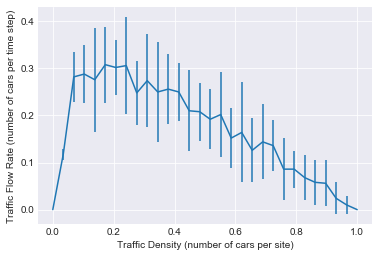

In [121]:
plot_flow_vs_density(t1[0],t1[1])

In [122]:
t2 = calculate_flow_rates(TrafficSimulator2)

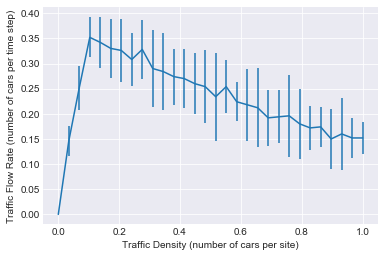

In [123]:
plot_flow_vs_density(t2[0],t2[1])

In [124]:
t3 = calculate_flow_rates(TrafficSimulator3)

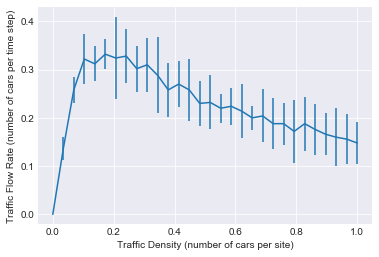

In [125]:
plot_flow_vs_density(t3[0],t3[1])

Text(0,0.5,'Traffic Flow Rates')

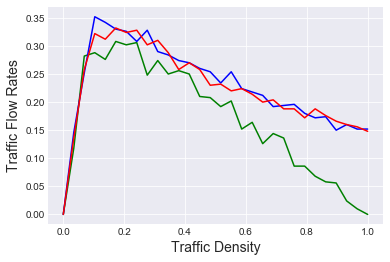

In [127]:
dens = scipy.linspace(0,1,num=30)
plt.plot(dens,t1[0], c = 'green', label="Traffic Simulator 1")
plt.plot(dens,t2[0], c = 'blue', label="Traffic Simulator 2")
plt.plot(dens,t3[0], c = 'red', label="Traffic Simulator 3")
plt.xlabel("Traffic Density", fontsize=14)
plt.ylabel('Traffic Flow Rates', fontsize=14)
#plt.legend(loc=2)